# 支持向量机
**classification**

### 概念
#### 超平面
将数据集分割开的对象。如果数据集是二维的，则超平面就是一条直线；如果数据集是三维的，则超平面是一个平面。即数据集为N维，超平面为N-1维。
#### 间隔
点到分割面的距离。
### 要解决的问题
找到离分割面最近的点，使他们离分割面尽可能的远。
### 距离的计算
#### 分割面的定义
$$W^TX+b=0$$
可以看做n元一次方程表示的平面，即平面的一般方程。
#### 距离的定义
对于平面外一点$x$到平面的距离有：
假设平面上任意一点$x^{'}$,则distance = $\vec{xx^{'}}$ 投影到$W^T$方向上再求模。
$W^T$方向为$\frac{W^T}{\begin{Vmatrix}W\end{Vmatrix}}$
<br>即$$distance=\begin{vmatrix} \frac{W^T}{\begin{Vmatrix}W^T\end{Vmatrix}} \left( X - X^{'} \right) \end{vmatrix}$$
又$$W^TX^{'}=-b$$<br>
故
$$distance=\frac{1}{\begin{Vmatrix}W\end{Vmatrix}}\left|W^TX+b  \right|$$

### 数据标签定义
数据集：(X1,Y1)(X2,Y2)...(Xn,Yn)<br>
当X为正例的时候，Y=+1,当X为负例的时候，Y=-1<br>
### 假设函数
$$y(x) = W^T\Phi(x)+b $$

$$
\begin{cases}
y(x_i)\geq +1 \iff y_i =+1 \\
y(x_i)\leq-1 \iff y_i=-1
\end{cases}
\implies
y_i·y(x_i)>0
$$

### 优化目标
找到一个边界（$W与b$），使得离改边界最近的点能够最远<br>
去掉distance中的绝对值得到：
$$
\frac
{y_i·
    \left( 
        W^T·\Phi(x_i)+b
     \right)
}
{
\begin{Vmatrix}
W
\end{Vmatrix}
}
$$
优化目标：
$$
\arg \max_{w,b}
\lbrace
    \frac
    {
        1
    }
    {
        \begin{Vmatrix}
            W
        \end{Vmatrix}
    }
    \min_i
    \left[
        y_i·
        \left(
            W^T·\Phi(x_i)+b
        \right)
    \right]
\rbrace
$$
化简为：<br>
$$
\max_{w,b}\frac{1}{ \begin{Vmatrix}W\end{Vmatrix}},
s.t. \ y_i(W^T\Phi(x_i)+b)\geq1
$$

即求
$$
\min_{w,b}\frac{1}{2}W^2,s.t. \ y_i(W^Tx_i+b)\geq1
$$
### 求解方法
拉格朗日乘数法<br>
构造拉格朗日函数
$$
L(w,b,\alpha)=\frac{1}{2}\begin{Vmatrix}W\end{Vmatrix}^2+\sum^{n}_{i=1}\alpha_i(1- (y_i(W^T x_i+b))
$$
因为$y_i w^Tx_i+b\geq1$,要求最小值，则$\alpha$ 最大，即问题变为
$$
\min_{w,b} \max_{\alpha} L(w,b,\alpha)
$$


对偶问题为
$$
\max_{\alpha} \min_{w,b}  L(w,b,\alpha)
$$

对W求偏导并取零得：
$$
\frac{\partial L}{\partial w}=0 \implies
w = \sum^{n}_{i=1}\alpha_i y_i x_i
$$



对b求偏导并取零：
$$
\frac{\partial L}{\partial b} =0 \implies
0 = \sum^{n}_{i=1}\alpha_i y_i  
$$
将其带入拉格朗提函数消去w,b得到：
$$L(w,b,\alpha)=
\sum^{n}_{i=1}\alpha_i - \frac{1}{2}
\sum^{n}_{i=1,j=1}\alpha_i \alpha_j y_i y_j x^{T}_{i} x_j
$$

继续对$\alpha$求极大值
$$
\max_\alpha (\sum^{n}_{i=1}\alpha_i - \frac{1}{2}\sum^{n}_{i=1,j=1}\alpha_i \alpha_j y_i y_j x^{T}_{i} x_j)
$$
$$s.t. \ \sum^{n}_{i=1}\alpha_i y_i=0 \\
\alpha_i \geq0
$$


极大值转为求极小值：
$$
\min_\alpha (  \frac{1}{2}\sum^{n}_{i=1,j=1}\alpha_i \alpha_j y_i y_j x^{T}_{i} x_j  - \sum^{n}_{i=1}\alpha_i)
$$
$$s.t. \ \sum^{n}_{i=1}\alpha_i y_i=0 \\
\alpha_i \geq0
$$
解出$\alpha_i$后，带入$w = \sum^{n}_{i=1}\alpha_i y_i x_i$,求出w

**所有决策边界上的点的$\alpha$值不等于0，也叫支持向量。**
### 软间隔
有些数据中有一些噪音点，影响边界的拟合，为了解决此问题引入松弛因子。
$$y_i(wx_i+b)\leq1-\xi_i$$
#### 新的目标函数
$$\min \frac{1}{2}||w||^2+C\sum^{n}_{i=1}\xi_i$$
当C很大时，$\xi_i$需要很小，松弛因子很小意味着分类严格不能有错误<br>
当C很小时，$\xi_i$可以很大，松弛因子很大意味着分类可以容忍更大的错误

### 核函数
当低维的数据集分类难度较大时，将之转为高维空间更容易分类。将低维的$x_i$映射到高维的$\Phi(x_i)$<br>
当映射到高维时，会涉及$\Phi(x_i)\Phi(x_j)$的运算，由于特征空间维数可能很高，甚至可能是无穷维，因此直接计算$\Phi(x_i)\Phi(x_j)$通常是困难的.为了避开这个障碍，可以设想这样一个函数:
$$
k(x_i,x_j)=\left<\Phi(x_i),\Phi(x_j)\right>=\Phi(x_i)\Phi(x_j)
$$
即 $x_i$ 与 $x_j$ 在特征空间的内积等于它们在原始样本空间中通过函数 $k(.,.)$计算的结果.有了这样的函数，我们就不必直接去计算高维甚至无穷维特征空间中的内积,这里的函数 $k(.,.)$就是"核函数" (kernel function)

### 常用的核函数
![常用核函数](img/常用核函数.png)


In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import samples_generator

In [550]:
# 创建聚类数据，centers：中心个数，cluster_std：聚类分散程度
x,y = samples_generator.make_blobs(
    n_samples=70,centers=2,
    random_state=0,cluster_std=0.8
)
x_,y_ = x,y

In [6]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [523]:
#绘制2D SVC
def plot_svc(model,ax = None, plot_sv = True):
    if ax == None:
        # Get Current Axes
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #在指定的间隔内返回均匀间隔的数字
    #numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    #生成点阵矩阵
    X,Y = np.meshgrid(x, y)
    # 堆叠两个shape为（n,1）的矩阵，为坐标系中所有的点创建坐标。
    xy = np.vstack((X.ravel(),Y.ravel())).T
    P = model.decision_function(xy).reshape(X.shape)
    
    plt.grid(color='lightgray' ,linestyle='-.')
    # 绘制等高线图
    # contour([X, Y,] Z, [levels], **kwargs)
    #print(P)
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_sv:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
              s = 200,c ='',
               marker='o', edgecolors='black',linewidth=1
              )

### 画出边界以及支持向量

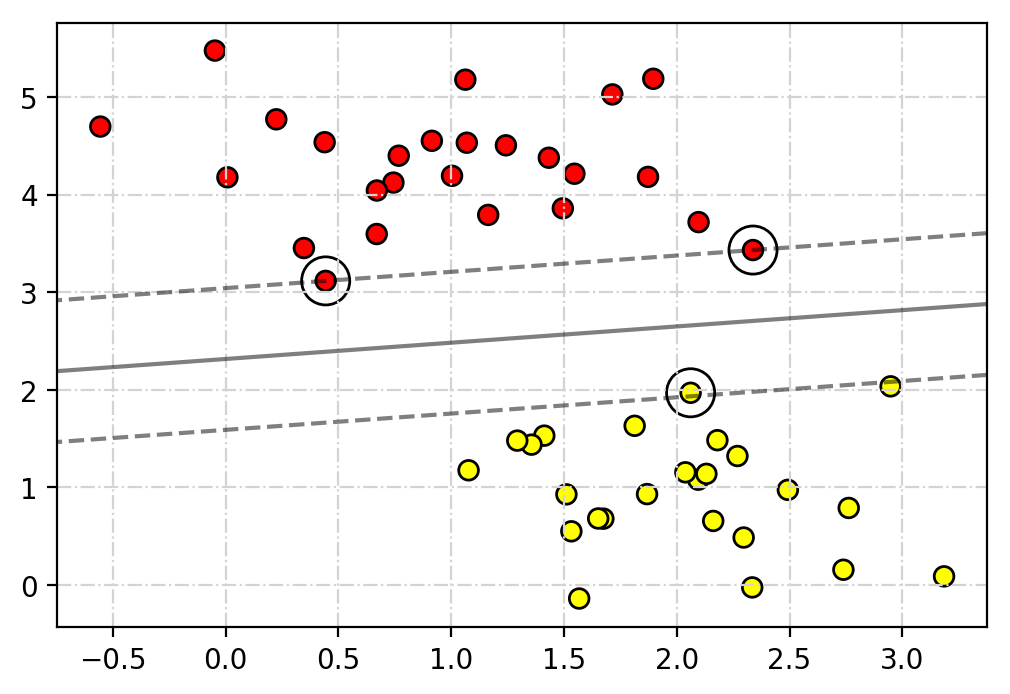

In [331]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
plt.scatter(x[:, 0], x[:, 1], c=y,edgecolors='black' ,s=50,cmap='autumn')
plot_svc(model)

### 当数据增加时，只要支持向量不变，分割边界就不变

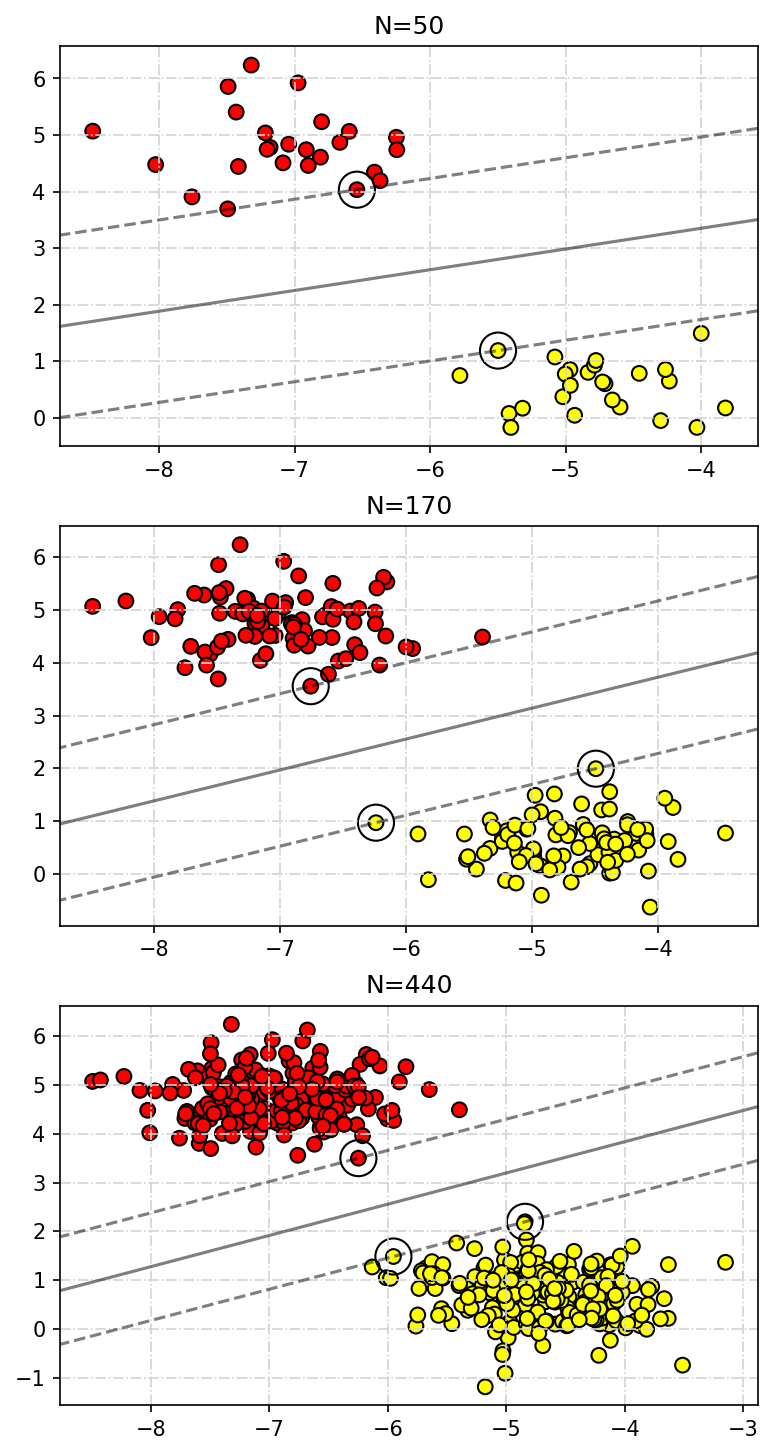

In [329]:
def same_sv(num_sample):
    data = []
    fig = plt.figure(figsize=(6,len(num_sample) * 4),dpi=150)
    for index, data_len in enumerate(num_sample):
        x,y = samples_generator.make_blobs(
            n_samples=num_sample[index],centers=2,
            random_state=12, cluster_std=0.5
        )
        plt.subplot(len(num_sample), 1, index + 1)
        plt.scatter(x[:, 0], x[:, 1],c = y, s=50, edgecolors='k',cmap='autumn')
        plt.title('N=%d' % num_sample[index])
        model = SVC(kernel='linear')
        model.fit(x,y)
        plot_svc(model)
same_sv([50,170,440])

 ###### 起决定作用的还是支持向量，只要支持向量不变，分割的超平面就不变。

### 引入和核函数的SVM

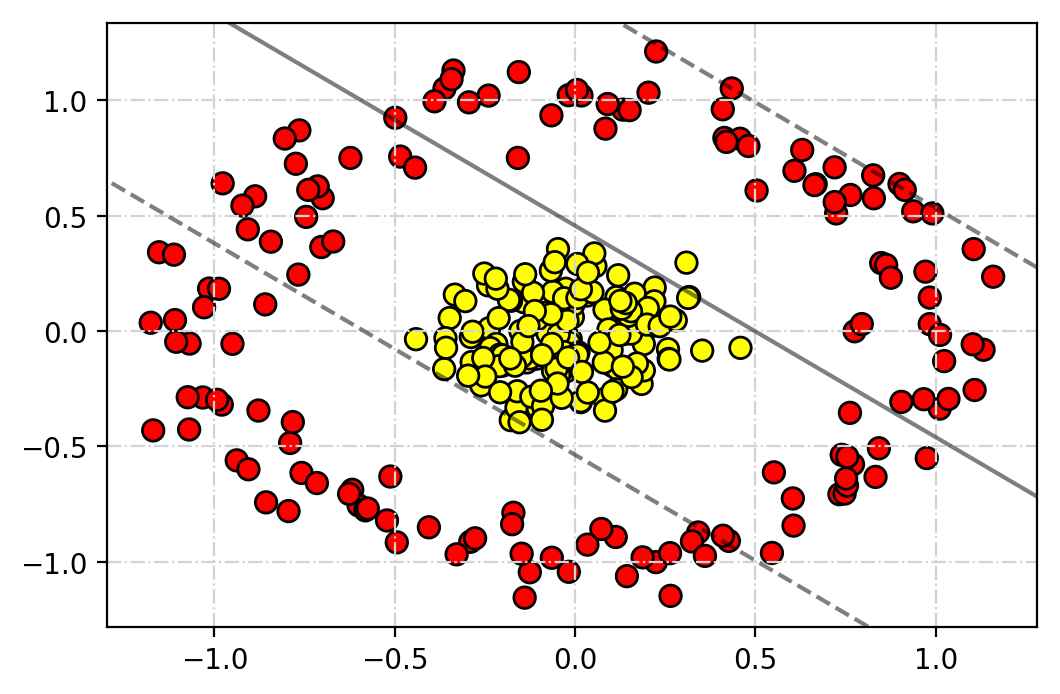

In [493]:
# factor: 外圈与内圈的尺度因子<1,noise 0.1: 表示有0.1为异常点
x,y = samples_generator.make_circles(300, factor=0.2, noise=0.1, random_state=0)
plt.figure(dpi=200)
plt.scatter(x[:,0],x[:,1], c=y,marker='o',s=60, edgecolors='k', cmap='autumn')
model = SVC(kernel='linear')
model.fit(x,y)
plot_svc(model, plot_sv=False)

**线性核函数无法分开此类数据**<br>
**新增加一维**

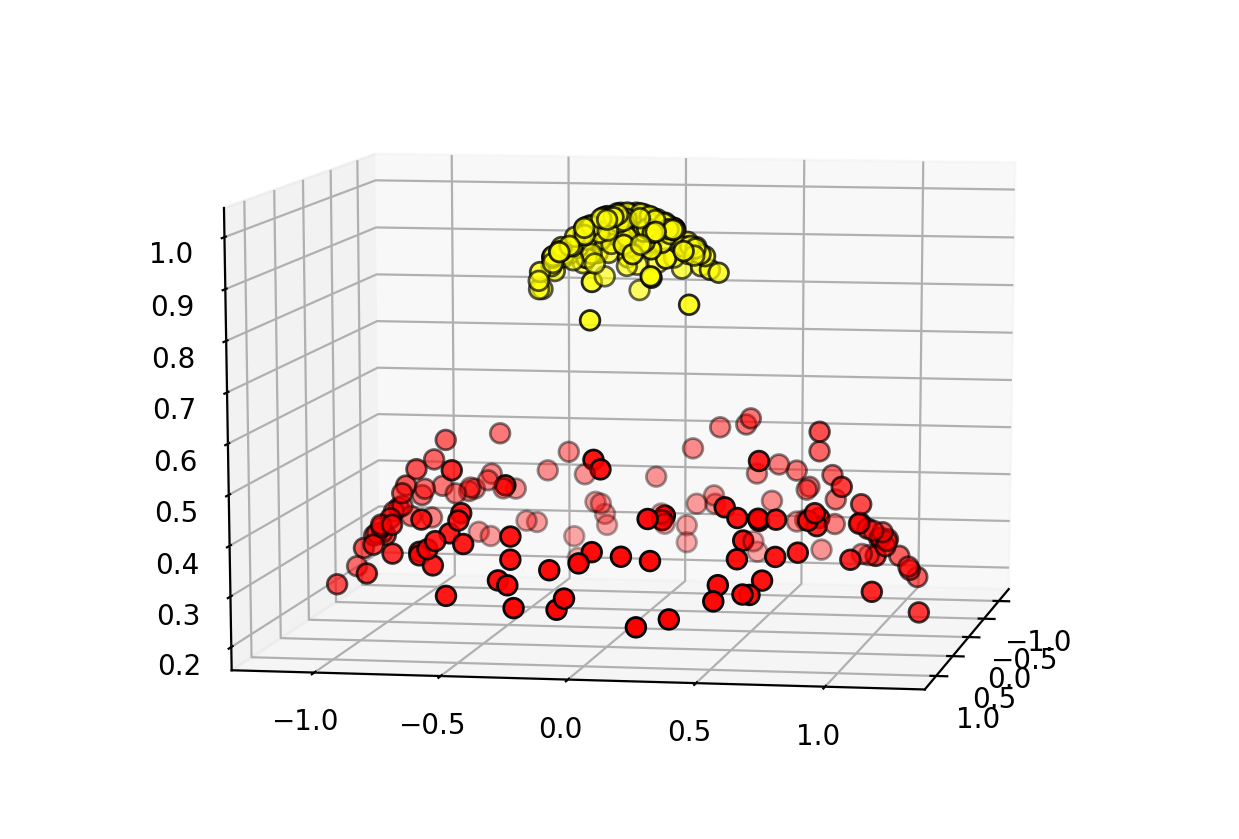

In [494]:
from mpl_toolkits.mplot3d import Axes3D
r = np.exp(-(x ** 2).sum(1))
def plot_3D():
    fig = plt.figure(dpi=200)
    ax = Axes3D(fig)
    
    #设置仰角与俯角
    ax.view_init(10, 10)
    ax.scatter3D(x[:, 0], x[:, 1], r, c=y, s=50, cmap='autumn', edgecolors='k')
plot_3D()

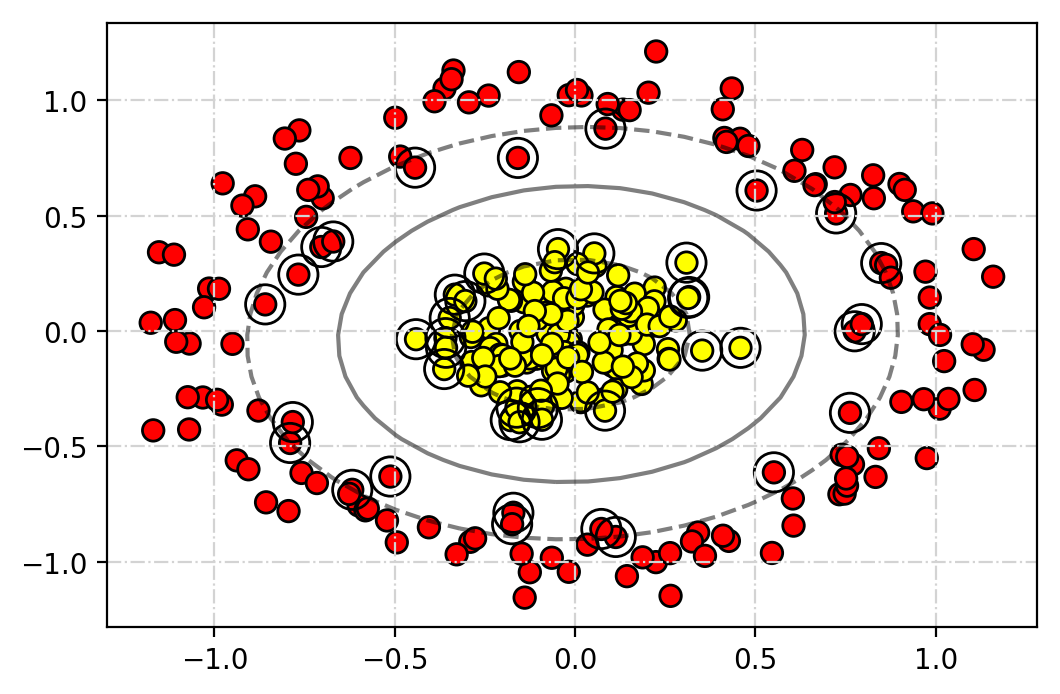

In [528]:
# 引入径向基函数（高斯核函数）
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(x,y)
plt.figure(dpi=200)
plt.scatter(x[:,0],x[:,1], c=y,marker='o', s=60, edgecolors='k', cmap='autumn')
plot_svc(clf)

## SVM参数，软间隔（Soft Margin）问题

肉眼可见，上图分类效果不好，很多支持向量在间隔里面，有错误，所以要调节参数

当C很大时，$\xi_i$需要很小，松弛因子很小意味着分类严格不能有错误<br>
当C很小时，$\xi_i$可以很大，松弛因子很大意味着分类可以容忍更大的错误

##### C 参数

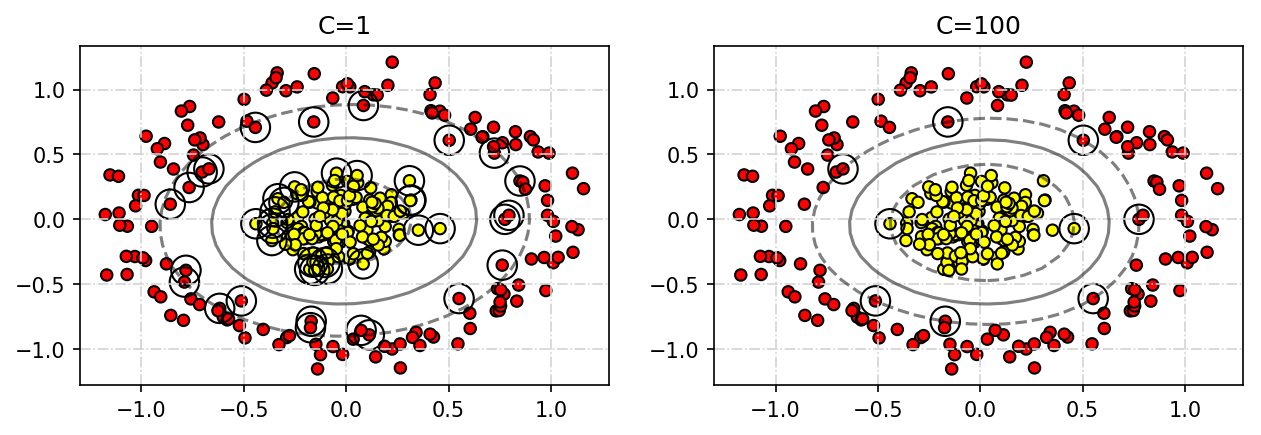

In [537]:
def C_param(C):
    plt.figure(figsize=(5* len(C),3) ,dpi=150)
    for i, c in enumerate(C):
        plt.subplot(1, len(C), i + 1)
        plt.title('C=%d' % c)
        clf = SVC(kernel='rbf',C = c, gamma='auto')
        clf.fit(x,y)
        plt.scatter(x[:,0],x[:,1], c=y,marker='o', s=30, edgecolors='k', cmap='autumn')
        plot_svc(clf)
C_param([1, 100])

#### gamma值，控制决策边界的复杂程度

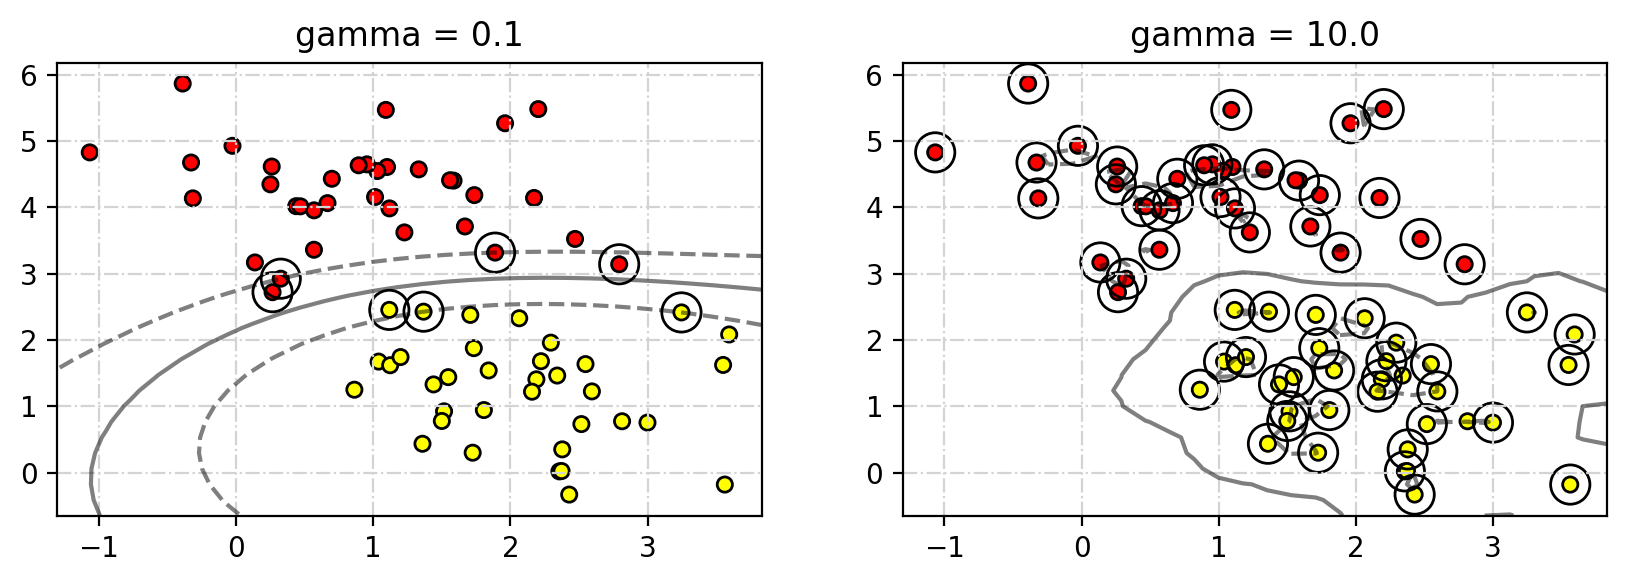

In [551]:

def gamma_param(C):
    plt.figure(figsize=(5* len(C),3) ,dpi=200)
    for i, c in enumerate(C):
        plt.subplot(1, len(C), i + 1)
        plt.title('gamma = %.1f' % c)
        clf = SVC(kernel='rbf',C= 10, gamma=c)
        clf.fit(x_,y_)
        plt.scatter(x_[:,0],x_[:,1], c=y,marker='o', s=30, edgecolors='k', cmap='autumn')
        plot_svc(clf)
gamma_param([0.1, 10])